<a href="https://colab.research.google.com/github/tropaafsara/diabetes-prediction-ML/blob/main/Diabetes_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dia = pd.read_csv('/content/drive/MyDrive/Pattern Dataset/diabetes_data.csv')

In [ ]:
dia.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [ ]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
dia.describe

<bound method NDFrame.describe of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  Hvy

In [ ]:
dia.shape

(70692, 18)

In [ ]:
dia.value_counts()

Age   Sex  HighChol  CholCheck  BMI   Smoker  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Stroke  HighBP  Diabetes
9.0   0.0  0.0       1.0        22.0  0.0     0.0                   1.0           1.0     1.0      0.0                1.0      0.0       0.0       0.0       0.0     0.0     0.0         21
7.0   0.0  0.0       1.0        23.0  0.0     0.0                   1.0           1.0     1.0      0.0                1.0      0.0       0.0       0.0       0.0     0.0     0.0         17
6.0   0.0  0.0       1.0        21.0  0.0     0.0                   1.0           1.0     1.0      0.0                1.0      0.0       0.0       0.0       0.0     0.0     0.0         17
5.0   0.0  0.0       1.0        21.0  0.0     0.0                   1.0           1.0     1.0      0.0                1.0      0.0       0.0       0.0       0.0     0.0     0.0         17
6.0   0.0  0.0       1.0        22.0  0.0     0.0                 

In [ ]:
dia.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [ ]:
dia.columns


Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
dia.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
dia.isnull().any()

Age                     False
Sex                     False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Stroke                  False
HighBP                  False
Diabetes                False
dtype: bool

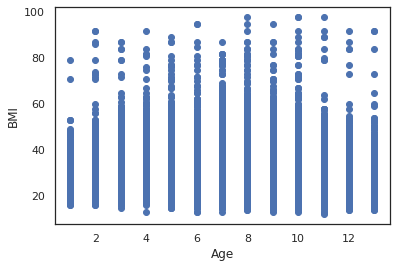

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dia['Age'], dia['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


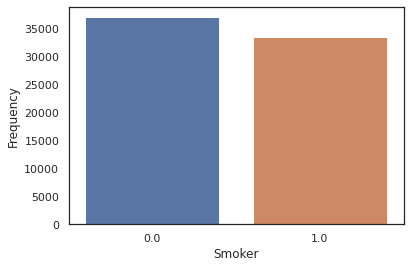

In [ ]:
import seaborn as sns

sns.countplot(dia['Smoker'])
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()


0.0    35346
1.0    35346
Name: Diabetes, dtype: int64


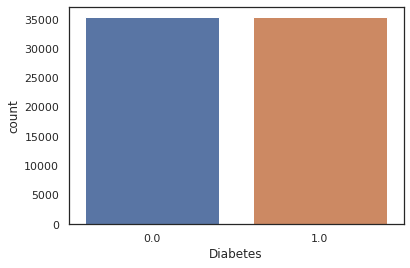

In [ ]:
print(dia['Diabetes'].value_counts())
_ = sns.countplot(x='Diabetes', data=dia)

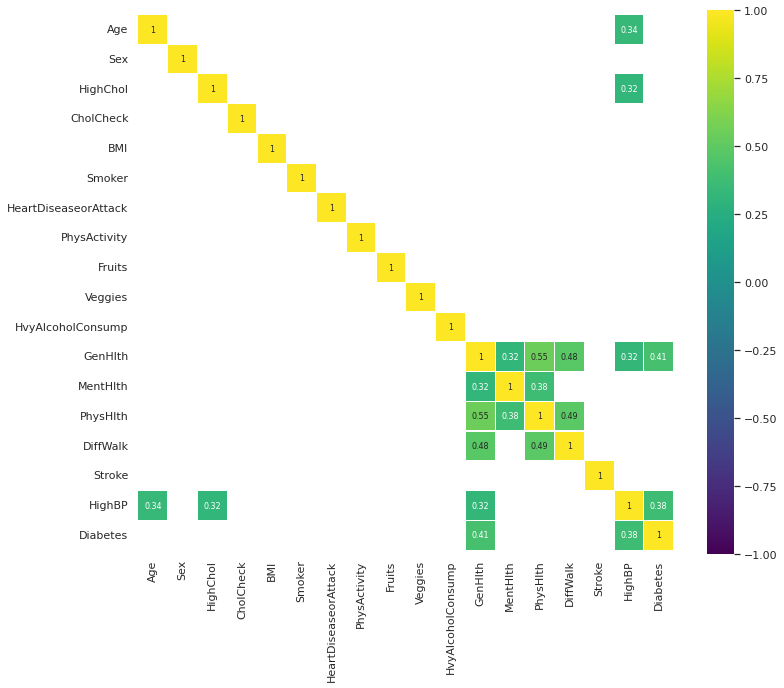

In [ ]:
corr = dia.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

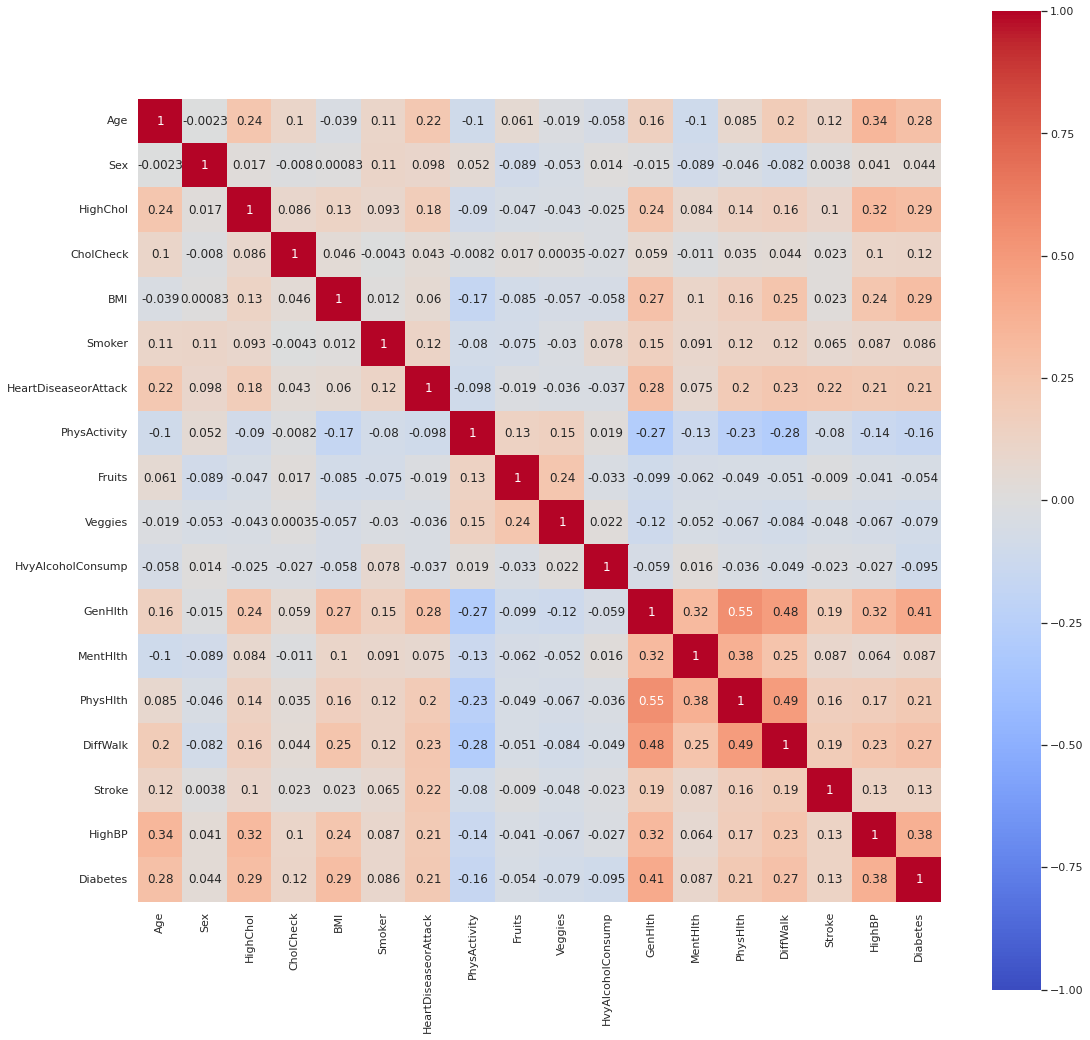

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(dia.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

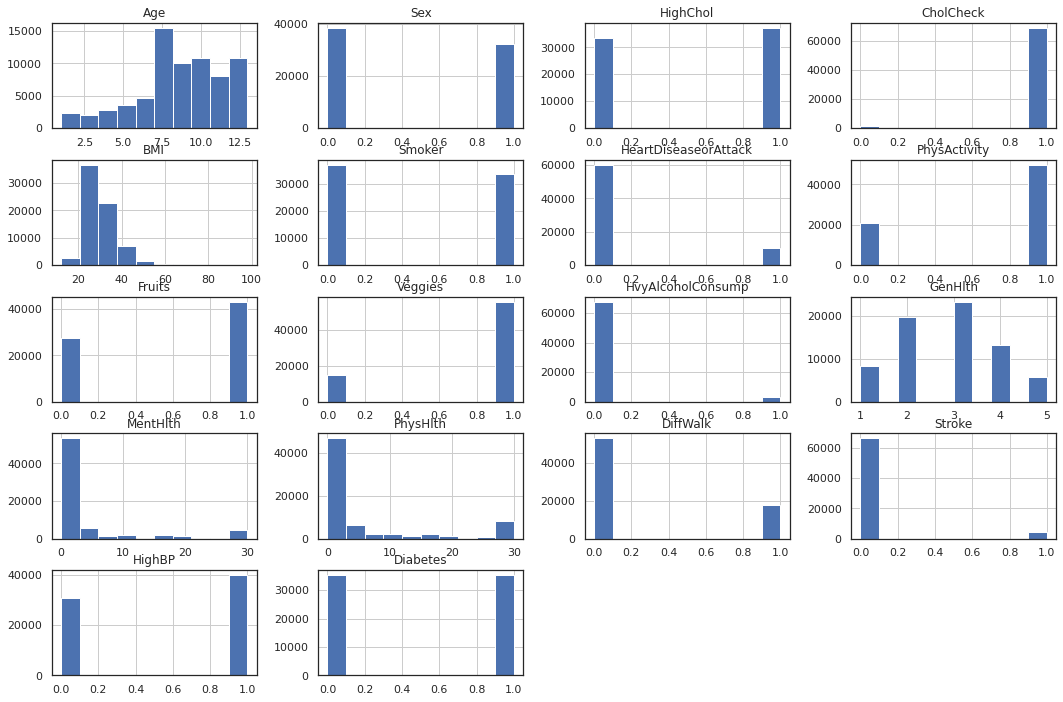

In [ ]:
dia.hist(figsize=(18,12))
plt.show()

In [ ]:
dia = dia[np.isfinite(dia).all(1)]

In [ ]:
X1 = dia.drop('Diabetes',axis=1)
y2 = dia[['Diabetes']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score,recall_score, f1_score

X_train , X_test , y_train , y_test = train_test_split(X1 , y2 , test_size=0.2,random_state=42)

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
accuracy_scores = []
y_train_pred = reg.predict(X_train)
y_test_pred =  reg.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print('LogisticRegression')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

LogisticRegression
Model performance for Training set (Diabetes)
- Accuracy: 0.7441
- F1 score: 0.744020
- Precision: 0.744464
- Recall: 0.744116
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7426
- Fl score: 0.7425
- Precision: 0.7431
- Recall: 0.7426




In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[5115 1975]
 [1664 5385]]


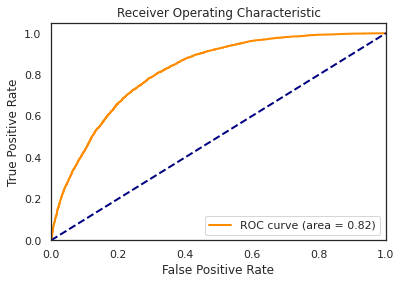

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

74.26267769997878


In [ ]:
y_predict_Regression = reg.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_Regression)
if y_predict_Regression==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


2. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred =  knn.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print('KNeighbors Classifier')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

KNeighbors Classifier
Model performance for Training set (Diabetes)
- Accuracy: 0.8277
- F1 score: 0.827708
- Precision: 0.827944
- Recall: 0.827737
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.6948
- Fl score: 0.6947
- Precision: 0.6952
- Recall: 0.6948




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

69.48157578329443


In [ ]:
y_predict_kNeighbors= reg.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_kNeighbors)
if y_predict_kNeighbors==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[4779 2311]
 [2004 5045]]


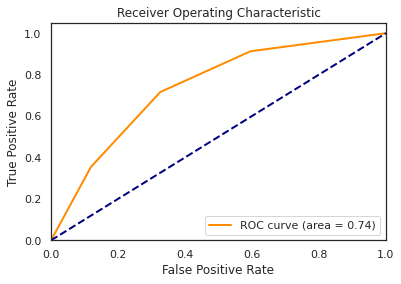

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


3. SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_train_pred = svc.predict(X_train)
y_test_pred =  svc.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print('SVC')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

SVC
Model performance for Training set (Diabetes)
- Accuracy: 0.7480
- F1 score: 0.747110
- Precision: 0.751417
- Recall: 0.747989
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7483
- Fl score: 0.7474
- Precision: 0.7519
- Recall: 0.7483




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

74.82848857769291


In [ ]:
y_predict_SVC= reg.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_SVC)
if y_predict_SVC==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[4891 2199]
 [1360 5689]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = svc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


AttributeError: ignored

4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_train_pred = gnb.predict(X_train)
y_test_pred =  gnb.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print('GaussianNB')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

GaussianNB
Model performance for Training set (Diabetes)
- Accuracy: 0.7245
- F1 score: 0.724447
- Precision: 0.724480
- Recall: 0.724453
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7225
- Fl score: 0.7225
- Precision: 0.7225
- Recall: 0.7225




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

72.24697644812221


In [ ]:
y_predict_SVC= reg.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_SVC)
if y_predict_SVC==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[5133 1957]
 [1967 5082]]


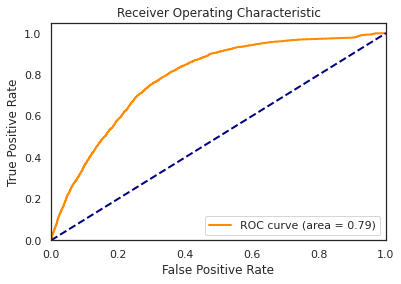

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = gnb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


5. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dtree.predict(X_train)
y_test_pred =  dtree.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print('DECISION TREE')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

DECISION TREE
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971769
- Precision: 0.972464
- Recall: 0.971779
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.6604
- Fl score: 0.6603
- Precision: 0.6606
- Recall: 0.6604




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

66.04427470118112


In [ ]:
y_predict_DecisionTree= reg.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_DecisionTree)
if y_predict_DecisionTree==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[4812 2278]
 [2523 4526]]


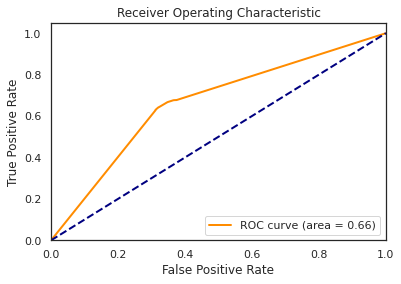

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = dtree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


6. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

<ipython-input-56-e5e3dc2635d0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
y_train_pred = rfc.predict(X_train)
y_test_pred =  rfc.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print(' RandomForestClassifier')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

 RandomForestClassifier
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971778
- Precision: 0.971804
- Recall: 0.971779
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7253
- Fl score: 0.7249
- Precision: 0.7267
- Recall: 0.7253




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

72.52988188697927


In [ ]:
y_predict_RandomForestClassifier= reg.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_RandomForestClassifier)
if y_predict_RandomForestClassifier==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[4875 2215]
 [1669 5380]]


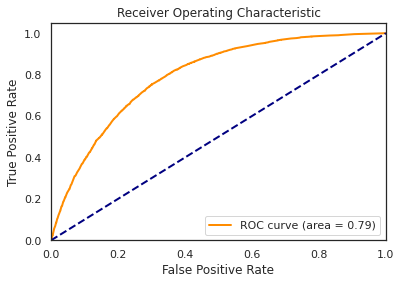

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = rfc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


7. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
y_train_pred = adb.predict(X_train)
y_test_pred =  adb.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print(' AdaBoostClassifier')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

 AdaBoostClassifier
Model performance for Training set (Diabetes)
- Accuracy: 0.7490
- F1 score: 0.748889
- Precision: 0.749486
- Recall: 0.749014
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7494
- Fl score: 0.7493
- Precision: 0.7500
- Recall: 0.7494




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

74.94165075323573


In [ ]:
y_predict_AdaBoostClassifier= adb.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_AdaBoostClassifier)
if y_predict_AdaBoostClassifier==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[5155 1935]
 [1608 5441]]


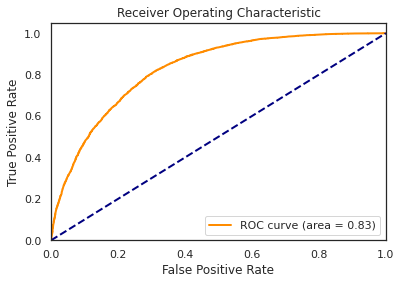

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = adb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


8. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
y_train_pred = gbc.predict(X_train)
y_test_pred =  gbc.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print(' GradientBoostingClassifier')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

 GradientBoostingClassifier
Model performance for Training set (Diabetes)
- Accuracy: 0.7537
- F1 score: 0.753217
- Precision: 0.755564
- Recall: 0.753682
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7527
- Fl score: 0.7523
- Precision: 0.7547
- Recall: 0.7527




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

75.27406464389279


In [ ]:
y_predict_GradientBoostingClassifier= gbc.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_GradientBoostingClassifier)
if y_predict_GradientBoostingClassifier==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[5037 2053]
 [1443 5606]]


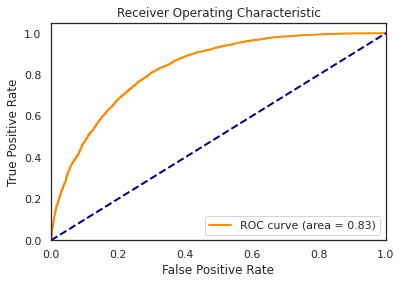

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = gbc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


9. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20:07:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [ ]:
y_train_pred = xgb.predict(X_train)
y_test_pred =  xgb.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print(' XGBClassifier')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

 XGBClassifier
Model performance for Training set (Diabetes)
- Accuracy: 0.7361
- F1 score: 0.735374
- Precision: 0.738853
- Recall: 0.736141
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7272
- Fl score: 0.7265
- Precision: 0.7300
- Recall: 0.7272




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

72.72084305820779


In [ ]:
y_predict_XGBClassifier= gbc.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_XGBClassifier)
if y_predict_XGBClassifier==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[4780 2310]
 [1547 5502]]


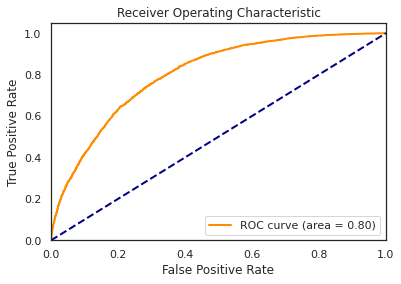

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


10. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train,y_train)

<ipython-input-79-5683e2380bd6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(X_train,y_train)


ExtraTreesClassifier(random_state=0)

In [ ]:
y_train_pred = etc.predict(X_train)
y_test_pred =  etc.predict(X_test)

  # Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')


accuracy_scores.append(model_train_accuracy)

print(' ExtraTreesClassifier')

print('Model performance for Training set (Diabetes)')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set (Diabetes)')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


print('='*35)
print('\n')

 ExtraTreesClassifier
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971769
- Precision: 0.972464
- Recall: 0.971779
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7116
- Fl score: 0.7114
- Precision: 0.7122
- Recall: 0.7116




In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)

71.15779050852252


In [ ]:
y_predict_ExtraTreesClassifier= etc.predict([[7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0]])
print(y_predict_ExtraTreesClassifier)
if y_predict_ExtraTreesClassifier==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1.]
Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Test set (Diabetes)')
print(cm)


Confusion Matrix for Test set (Diabetes)
[[4860 2230]
 [1848 5201]]


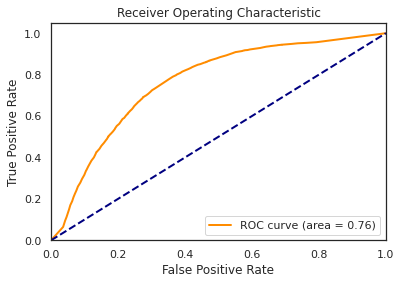

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_score = etc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
models=[
    "Logisitic Regression",
    "K-Nearest Neighbors",
    "Multinomial Naive Bayes",
    "SVC"
    "Decision Tree" ,
    "Random Forest",
    "AdaBoost Classifier" ,
    "Gradient Boosting Classifier",
    "XGB Classifier" ,



]
# create a dataframe
models = pd.DataFrame({'Model': models, 'Score': accuracy_scores})

# sort the dataframe by Score in descending order
models.sort_values(by = 'Score', ascending = False)


,Model,Score
1,K-Nearest Neighbors,0.971779
7,XGB Classifier,0.971779
2,Multinomial Naive Bayes,0.971761
3,SVCDecision Tree,0.827737
5,AdaBoost Classifier,0.753682
4,Random Forest,0.749014
0,Logisitic Regression,0.747741
6,Gradient Boosting Classifier,0.736141


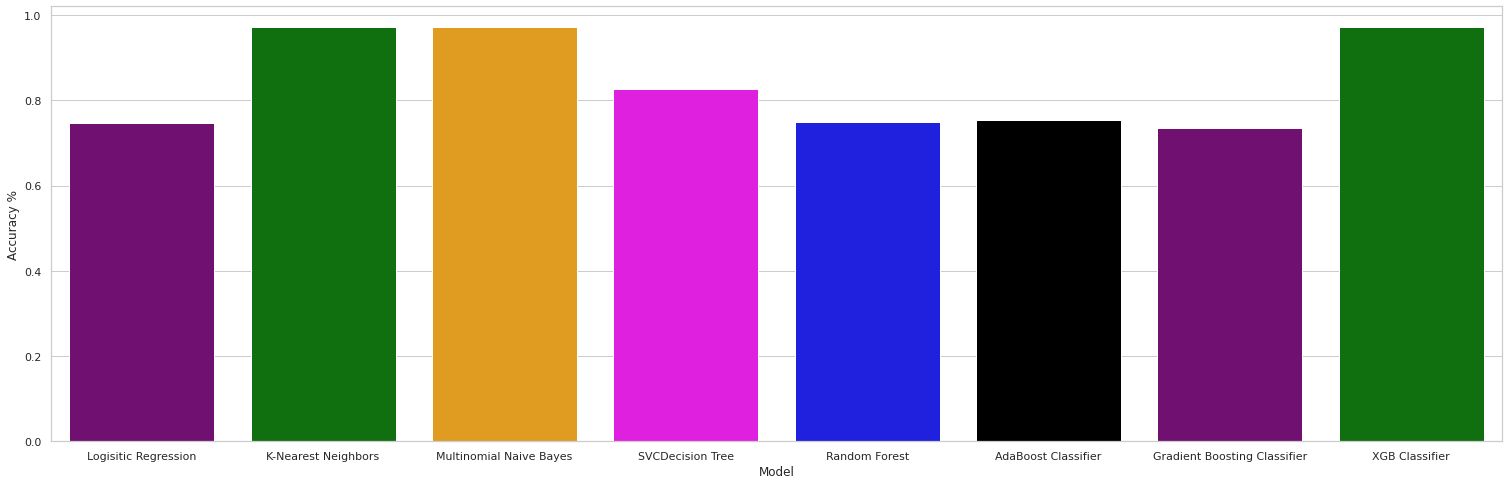

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(26,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=accuracy_scores, palette=colors )
plt.show()

In [ ]:
model_names = []
accuracy_scores = []
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "AdaBoost Classifier" : AdaBoostClassifier(base_estimator = None),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(),
    "XGB Classifier" : XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10),
    "ExtraTreesClassifier" : ExtraTreesClassifier(n_estimators=100, random_state=0)

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    model_names.append(list(models.keys())[i])
    accuracy_scores.append(model_train_accuracy)

    print(list(models.keys())[i])

    print('Model performance for Training set (Diabetes)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set (Diabetes)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set (Diabetes)
- Accuracy: 0.7477
- F1 score: 0.747636
- Precision: 0.748133
- Recall: 0.747741
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7464
- Fl score: 0.7463
- Precision: 0.7470
- Recall: 0.7464


Decision Tree
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971769
- Precision: 0.972464
- Recall: 0.971779
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.6597
- Fl score: 0.6595
- Precision: 0.6598
- Recall: 0.6597


Random Forest
Model performance for Training set (Diabetes)
- Accuracy: 0.9718
- F1 score: 0.971761
- Precision: 0.971788
- Recall: 0.971761
----------------------------------
Model performance for Test set (Diabetes)
- Accuracy: 0.7276
- Fl score: 0.7271
- Precision: 0.7291
- Recall: 0.7276


K-Nearest Neighbors
Model performance for Training set (Diabetes)
- Accuracy: 0.8277
- F1 score: 0.827708
- 

In [ ]:
# create a dataframe
models = pd.DataFrame({'Model': model_names, 'Score': accuracy_scores})

# sort the dataframe by Score in descending order
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree,0.971779
7,ExtraTreesClassifier,0.971779
2,Random Forest,0.971761
3,K-Nearest Neighbors,0.827737
5,Gradient Boosting Classifier,0.753682
4,AdaBoost Classifier,0.749014
0,Logisitic Regression,0.747741
6,XGB Classifier,0.736141


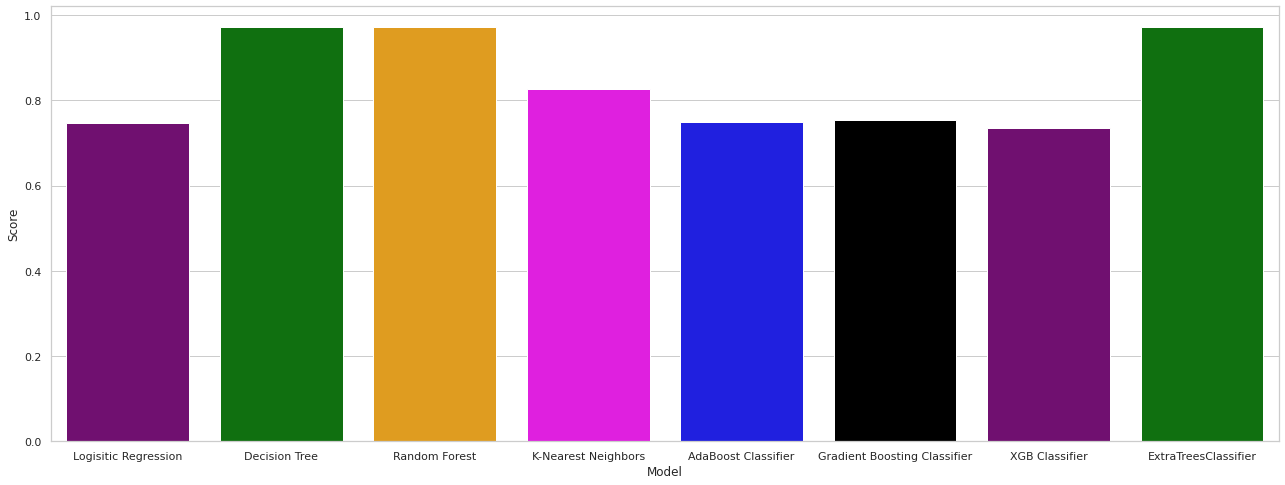

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(22,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
feature_imp = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_plot = sns.barplot(x = feature_imp, y = feature_imp.index)
feature_plot.set_title("Feature Importance Plot")
feature_plot.set_xlabel("Score")
feature_plot.set_ylabel("Feature")

NameError: ignored

<Figure size 864x432 with 0 Axes>